1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg

Eigendecomposition E.Vectors :
 [[-0.121547    0.5644109  -0.81649658]
 [-0.56971235 -0.71327496 -0.40824829]
 [-0.81280635  0.41554683  0.40824829]]

Eigendecomposition E.Values :
 [ 2.59242433e+01  1.96370546e+00 -2.46855150e-16]

SVD E.Vectors:
 [[-0.121547    0.5644109  -0.81649658]
 [-0.56971235 -0.71327496 -0.40824829]
 [-0.81280635  0.41554683  0.40824829]]

SVD E.Values:  [2.59242433e+01 1.96370546e+00 4.71519933e-16]

E.Vectors yield the same result : True
E.Values yield the same result : True


Retained variability with component 0 and 1(order of eigendecomposition is setted the same with svd.):  100.0
Using component 0 and 1, we retain 100% variability. When how the dataset is created is considered, this totally makes sense. 
Component 3 in this case, has no contribution to the dataset.


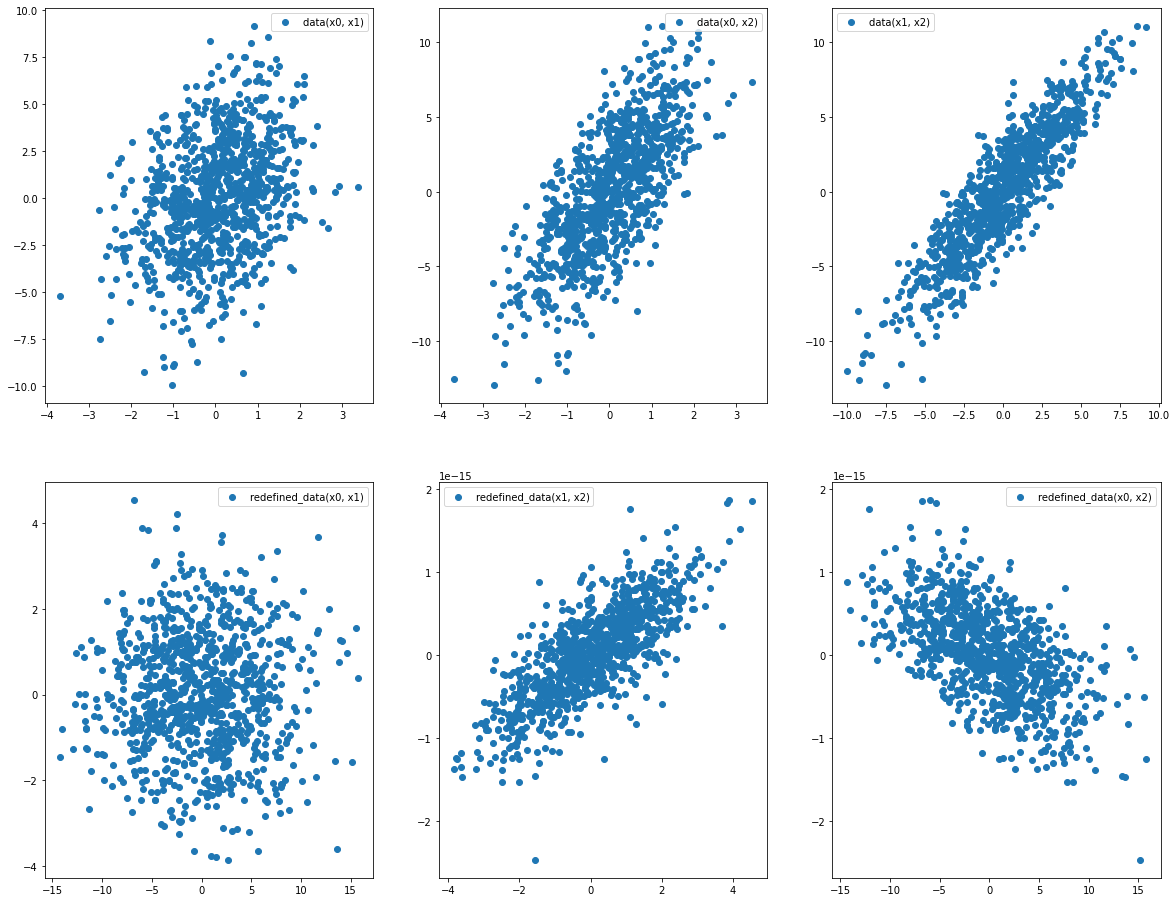

In [4]:
# 10ex - 1

N = 1000
x1 = np.random.normal(0, 1, size = N)
x2 = x1 + np.random.normal(0, 3, size = N)
x3 = (2 * x1) + x2
data = np.vstack((x1, x2, x3))

cov = np.cov(data)

l, V = linalg.eig(cov)
index = np.argsort(l,axis=-1)[::-1] # setting the order of eigendecomposition to fit with svd
V = V[:, index]
l = l[index]
l = np.real_if_close(l)
print("Eigendecomposition E.Vectors :\n", V)
print("\nEigendecomposition E.Values :\n", l)

V_svd, l_svd, Vt = linalg.svd(cov)

print("\nSVD E.Vectors:\n", V_svd)
print("\nSVD E.Values: ", l_svd)

print("\nE.Vectors yield the same result :", np.allclose(V,V_svd))
print("E.Values yield the same result :", np.allclose(l,l_svd))
print("\n")
print("Retained variability with component 0 and 1(order of eigendecomposition is setted the same with svd.): ", np.sum([l[0], l[1]]) / np.sum(l) * 100)
print("Using component 0 and 1, we retain 100% variability. When how the dataset is created is considered, this totally makes sense. \nComponent 3 in this case, has no contribution to the dataset.") 

redefined_data = np.dot(V.T, data)

fig, ax = plt.subplots(2,3,figsize=(20, 16))
ax[0,0].scatter(data[0,:],data[1,:], label = "data(x0, x1)")
ax[0,0].legend()
ax[0,1].scatter(data[0,:],data[2,:], label = "data(x0, x2)")
ax[0,1].legend()
ax[0,2].scatter(data[1,:],data[2,:], label = "data(x1, x2)")
ax[0,2].legend()
# order of eigendecomposition is setted the same with svd
ax[1,0].scatter(redefined_data[0,:],redefined_data[1,:], label = "redefined_data(x0, x1)")
ax[1,0].legend()
ax[1,1].scatter(redefined_data[1,:],redefined_data[2,:], label = "redefined_data(x1, x2)")
ax[1,1].legend()
ax[1,2].scatter(redefined_data[0,:],redefined_data[2,:], label = "redefined_data(x0, x2)")
ax[1,2].legend()
plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [7]:
# 10ex - 2

noise = np.random.normal(size = (N, 3), scale = 1/40)
noised_data = data + np.sum(noise.T)

cov_n = np.cov(noised_data)

l_n, V_n = linalg.eig(cov_n)
index = np.argsort(l_n,axis=-1)[::-1] # setting the order of eigendecomposition to fit with svd
V_n = V_n[:, index]
l_n = l_n[index]
l_n = np.real_if_close(l_n)
print("Eigendecomposition E.Vectors :\n", V_n)
print("\nEigendecomposition E.Values :\n", l_n)

V_svd_n, l_svd_n, Vt_svd_n = linalg.svd(cov_n)

print("\nSVD E.Vectors:\n", V_svd_n)
print("\nSVD E.Values: ", l_svd_n)

print("\nE.Vectors yield the same result :", np.allclose(V_n, V_svd_n))
print("E.Values yield the same result :", np.allclose(l_n, l_svd_n))

print("Retained variability with component 0 and 1(order of eigendecomposition is setted the same with svd.): ", np.sum([l_n[0], l_n[1]]) / np.sum(l_n) * 100)

print("\nWe got the exact same variability with the original data. The added noise did not change our results.")

Eigendecomposition E.Vectors :
 [[-0.121547    0.5644109  -0.81649658]
 [-0.56971235 -0.71327496 -0.40824829]
 [-0.81280635  0.41554683  0.40824829]]

Eigendecomposition E.Values :
 [ 2.59242433e+01  1.96370546e+00 -4.27722539e-16]

SVD E.Vectors:
 [[-0.121547    0.5644109  -0.81649658]
 [-0.56971235 -0.71327496 -0.40824829]
 [-0.81280635  0.41554683  0.40824829]]

SVD E.Values:  [2.59242433e+01 1.96370546e+00 5.34389258e-16]

E.Vectors yield the same result : True
E.Values yield the same result : True
Retained variability with component 0 and 1(order of eigendecomposition is setted the same with svd.):  100.0

We got the exact same variability with the original data. The added noise did not change our results.


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [14]:
#10ex - 3

dataset=pd.read_csv('magic04.data', index_col = False)
labels=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
dataset.columns=labels

dataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
